'\n    \n\n'

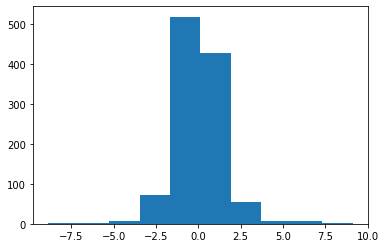

In [5]:
#DGP

#Simulate Data Generating Process
#a You do not control for any covariates
slope_estimates = []
import random
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
# sample size
# n = 100
def write_csv(name,X,Y):
    with open(name,'a+') as f:
        f.write('X,Y\n')
        for x,y in zip(X,Y):
            # feature='|'.join(i.feature)
            f.write(f'{x},{y}\n')       
        f.close()
        
for  n in [100,1000]:
    for mc_replication in range(n):
        a=random.randint(0,1)
        b = random.randint(0,0)
        X = np.random.uniform(0,1,n)
        e = np.random.normal(0,10,n)
        Y = a+b*np.log(1+X)+e
        mod = sm.OLS(Y,sm.add_constant(X))
        res = mod.fit()
        slope_estimates = slope_estimates + [res.params[1]]
    write_csv(f'./mt_1_1{n}.csv',X,Y)
np.mean(slope_estimates)
plt.hist(slope_estimates)

# write_csv()
"""
    

"""

#

In [ ]:
import graphviz as gr
g = gr.Digraph()

g.edge("randomly assigned treatmen", "interest")
g.edge(" some observed covariates", "interest")
g

example of the outcome of interest depends on a randomly assigned treatment and
some observed covariates and do not control for any covariates

e : Have attended college or not.
Y : Average investments.
X : Average wage.
b : Average wage.

'\n\n\n'

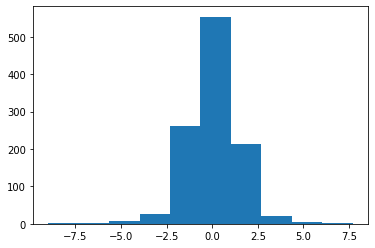

In [6]:
#You control for all the covariates that affect the outcome
a = .5
b =0
# n = 100
slope_estimates = []
# sample size
for n in [100,1000]:
    for mc_replication in range(n):
        X = np.random.uniform(0,1,n)
        e = np.random.normal(0,10,n)
        Y = a+b*np.log(1+X)+e
        mod = sm.OLS(Y,sm.add_constant(X))
        res = mod.fit()
        slope_estimates = slope_estimates + [res.params[1]]
    write_csv(f'./mt_1_2{n}.csv',X,Y)
np.mean(slope_estimates)
plt.hist(slope_estimates)

"""


"""

In [ ]:
#Illustrate your DGP with a DAG
import graphviz as gr
g = gr.Digraph()

g.edge("randomly assigned treatmen", "interest")
g.edge(" some observed covariates", "interest")
g

example of the outcome of interest depends on a randomly assigned treatment and
some observed covariates and  control for all the covariates that affect the outcome

e : Have attended college or not.
Y : Average investments.
X : Average wage.
b : baise
control: the reglate change

'\n\n\n'

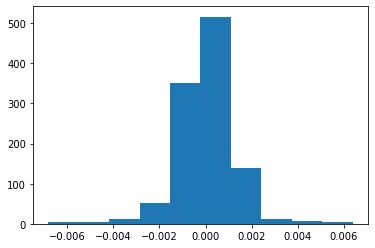

In [7]:
#2 Simulate a DGP with a confounder (common cause)
#You fail to control for the confounder

def simulate_data(a, b,n,confounder):
        """
        a: intercept
        b: slope
        n: sample size
        sigma: confounder
        Y = a+b*X+e
        """
        X = np.random.uniform(0,1,n)
        e = np.random.normal(0,10,n)
        Y = a+b*np.log(1+X)+e + confounder
        
        return (Y,X)
a = .5
b = 0
# n = 100
slope_estimates = []
# sample size
for n in [100,1000]:
    for mc_replication in range(n):
        confounder = np.random.uniform(0,n)    
        X,Y = simulate_data(a, b,n,confounder)
        mod = sm.OLS(Y,sm.add_constant(X))
        res = mod.fit()
        slope_estimates = slope_estimates + [res.params[1]]
    write_csv(f'./mt_2_1{n}.csv',X,Y)
np.mean(slope_estimates)
plt.hist(slope_estimates)

"""


"""


In [ ]:
#Illustrate your DGP with a DAG
import graphviz as gr
g = gr.Digraph()

g.edge("control randomly assigned treatmen", "interest")
g.edge("control some observed covariates", "interest")
g

example of Parents education affects your personal ideology, which is mediated by your parents political ideology (affected by their education level). The other is that your SAT score affects your income level but through college acceptance

'\n\n\n'

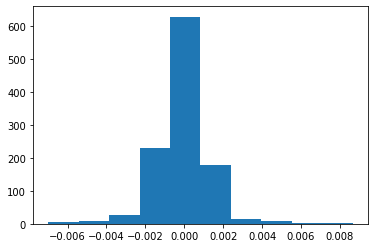

In [8]:



#. You do control for the confounder

a = .5
b = 0
n = 100
slope_estimates = []
confounder = np.random.uniform(0,10) 
# sample size
for n in [100,1000]:
    for mc_replication in range(n):
        
        X,Y = simulate_data(a, b,n,confounder)
        mod = sm.OLS(Y,sm.add_constant(X))
        res = mod.fit()
        slope_estimates = slope_estimates + [res.params[1]]
    write_csv(f'./mt_2_2{n}.csv',X,Y)
np.mean(slope_estimates)
plt.hist(slope_estimates)

"""


"""

In [ ]:
g = gr.Digraph()



g.edge("control", "confounder")
g.edge("confounder", "treatment")
g.edge("confounder", "outcome")

g.edge("treatment", "outcome")

g

For example, if a test paper with 100 multiple-choice questions has a score of one point for each question, and the difficulty is similar, then the score of a person doing this test paper is the sum of 100 random variables

'\n\n\n'

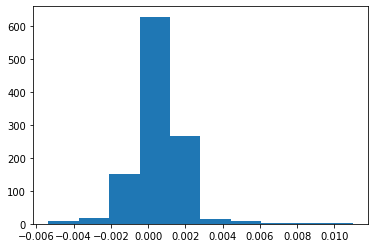

In [9]:
# Simulate a DGP with selection bias into the treatment (variable in between the path from the
#treatment to the outcome)
#You control for the variable in between the path from cause to effect
a = .5
b = 1.1
n = 100
slope_estimates = []
confounder =0
# sample size
for n in [100,1000]:
    for mc_replication in range(n):
        
        X,Y = simulate_data(a, b,n,confounder)
        mod = sm.OLS(Y,sm.add_constant(X))
        res = mod.fit()
        slope_estimates = slope_estimates + [res.params[1]]
    write_csv(f'./mt_3_1{n}.csv',X,Y)
np.mean(slope_estimates)
plt.hist(slope_estimates)
"""


"""

In [ ]:
g = gr.Digraph()


g.edge("bias 1", "treatment")
g.edge("bias 2", "treatment")

g.edge("bias 3", "treatment")

g

'\n\n\n'

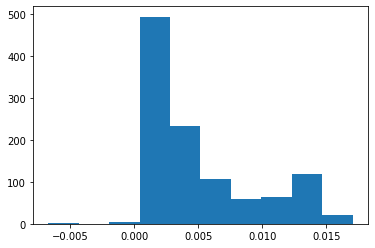

In [10]:
#You do not control for the variable in between the path from cause to effect
a = .5

n = 100
slope_estimates = []
confounder = 0
# sample size
for n in [100,1000]:
    for mc_replication in range(n):
        b = np.random.randint(0,n)
        X,Y = simulate_data(a, b,n,confounder)
        mod = sm.OLS(Y,sm.add_constant(X))
        res = mod.fit()
        slope_estimates = slope_estimates + [res.params[1]]
    write_csv(f'./mt_3_2{n}.csv',X,Y)
np.mean(slope_estimates)
plt.hist(slope_estimates)

"""


"""

In [3]:
g = gr.Digraph()


g.edge("bias 1", "treatment")
g.edge("bias 2", "treatment")

g.edge("bias 3", "treatment")

g

NameError: name 'gr' is not defined

• approximately 68% of the scores are between 1000 and 1300, within 1 standard deviation of the mean.
• approximately 95% of the scores are between 850 and 1450, within 2 standard deviations of the mean.
• approximately 99.7% of the scores are between 700 and 1600, within 3 standard deviations of the mean.

'\n\n\n'

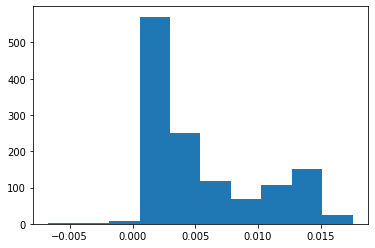

In [11]:
#Simulate a DGP where the outcome variable is overrepresented at 0.
#You estimate the treatment effect parameter using the Conditional-on-Positives (COP) framework
miu=10
sigma=0
a=random.gauss(miu,sigma)
for n in [100,1000]:
    for mc_replication in range(100):
        b = np.random.randint(0,n)
        X,Y = simulate_data(a, b,n,confounder)
        mod = sm.OLS(Y,sm.add_constant(X))
        res = mod.fit()
        slope_estimates = slope_estimates + [res.params[1]]
    write_csv(f'./mt_4_1{n}.csv',X,Y)
np.mean(slope_estimates)
plt.hist(slope_estimates)

"""


"""

In [1]:
g = gr.Digraph()


g.edge("overrepresented", "outcome")
g

NameError: name 'gr' is not defined

When the caution rate is 58, it is 8 lower than the average, that is, 2 standard deviations. According to 3 σ In principle, about 95% of the values are within 2 standard deviations from the mean. Therefore, 2.5% of the values are lower than the mean and more than two standard deviations, and 2.5% of the values are higher than the mean and more than two standard deviations. For 2.5% days of the year, or 9 days, your measured heart rate will be less than 58 beats per minute.

In [ ]:
#example

'\n\n\n'

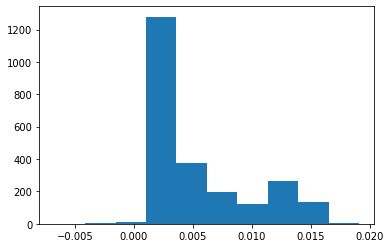

In [12]:
#You estimate the treatment effect using the conventional method of comparing the
#outcomes of treated and untreated individuals.
miu=10
sigma=0
a=random.gauss(miu,sigma)
for n in [100,1000]:
    for mc_replication in range(n):
        b = np.random.randint(0,n)
        X,Y = simulate_data(a, b,n,confounder)
        mod = sm.OLS(Y,sm.add_constant(X))
        res = mod.fit()
        slope_estimates = slope_estimates + [res.params[1]]
    write_csv(f'./mt_4_2{n}.csv',X,Y)
np.mean(slope_estimates)
plt.hist(slope_estimates)


In [ ]:
g = gr.Digraph()


g.edge("overrepresented", "outcome")
g

Hospital statistics show that the number of days between the actual date of birth and the expected date of delivery of newborns follows the normal distribution of mean M = 0 days and standard deviation s = 15 days

In [ ]:
#example